# Matplotlib - Maillage triangulaire 2D
Que faire quand les noeuds n'échantillonnage ne sont pas sur une grille?

## triangulation
On désire tracer le maillage obtenu par triangulation d\'un ensemble
de points répartis aléatoirement dans le plan (x,y)

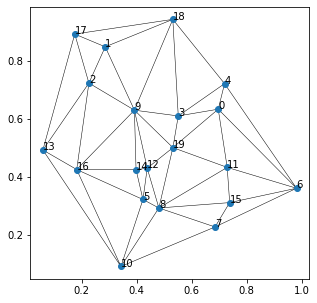

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as tri
    
N=20
np.random.seed(123)
x=np.random.rand(N)
y=np.random.rand(N)

triang = tri.Triangulation(x, y)
plt.figure(figsize=(5, 5))
plt.triplot(triang, lw=0.5, color='black')
plt.plot(x, y, 'o')
for i in range(N):
    plt.text(x[i], y[i], str(i))

## Isovaleurs
On désire tracer les isovaleurs d'une fonction échantillonnée aux noeuds d'un maillage triangulaire

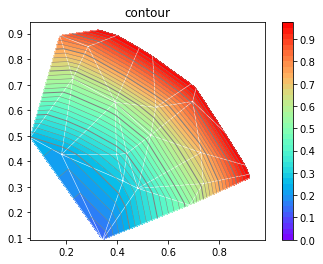

In [2]:
from matplotlib import cm

plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

z=x*x+y*y

levels = np.arange(0., 1., 0.025)
#cmap = cm.get_cmap(name='terrain', lut=None)
cmap = cm.get_cmap(name='rainbow')
cset =plt.tricontourf(triang, z, levels=levels, cmap=cmap)
plt.colorbar()
plt.tricontour(triang, z, levels=levels,
               colors=['0.5', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("contour")

plt.show()